#### 1.import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

#### 2.Set parameters for data simulation

In [2]:

start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)
machine_ids = ["Machine 1", "Machine 2", "Machine 3"]
frequency = '15T'  # Every 15 minutes

# range for each 15-minute interval in the month
timestamps = pd.date_range(start=start_date, end=end_date, freq=frequency)

#DataFrame
data = {
    "Timestamp": np.tile(timestamps, len(machine_ids)),
    "MachineID": np.repeat(machine_ids, len(timestamps)),
    "Temperature": np.concatenate([
        np.random.normal(75, 5, len(timestamps)),  # Simulated data for Machine 1
        np.random.normal(70, 5, len(timestamps)),  # Simulated data for Machine 2
        np.random.normal(65, 5, len(timestamps))   # Simulated data for Machine 3
    ])
}

df = pd.DataFrame(data)

C:\Users\hey\AppData\Local\Temp\ipykernel_1516\2817564264.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start=start_date, end=end_date, freq=frequency)


In [3]:
df.head()

,Timestamp,MachineID,Temperature
0,2023-01-01 00:00:00,Machine 1,80.388344
1,2023-01-01 00:15:00,Machine 1,83.300779
2,2023-01-01 00:30:00,Machine 1,73.284047
3,2023-01-01 00:45:00,Machine 1,72.856243
4,2023-01-01 01:00:00,Machine 1,82.452425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8643 entries, 0 to 8642
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    8643 non-null   datetime64[ns]
 1   MachineID    8643 non-null   object        
 2   Temperature  8643 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 202.7+ KB


In [5]:
df.describe()

,Timestamp,Temperature
count,8643,8643.000000
mean,2023-01-16 00:00:00,70.087499
min,2023-01-01 00:00:00,49.754620
25%,2023-01-08 12:00:00,65.524581
50%,2023-01-16 00:00:00,70.180944
75%,2023-01-23 12:00:00,74.643640
max,2023-01-31 00:00:00,92.460910
std,NaN,6.450027


#### 3.Analyzing the Data

In [6]:
# Trend Analysis - Compute rolling mean for smooth trends
df['RollingMeanTemp'] = df.groupby('MachineID')['Temperature'].transform(lambda x: x.rolling(window=96, min_periods=1).mean())

# Statistics
summary_stats = df.groupby("MachineID")['Temperature'].agg(['mean', 'max', 'min']).reset_index()

#### 4.Visualization

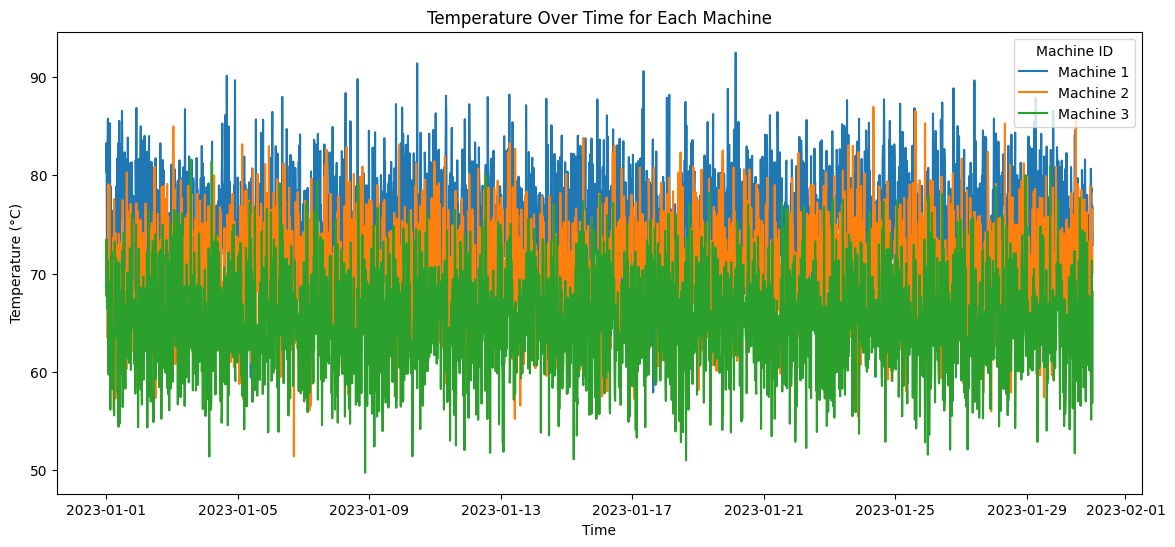

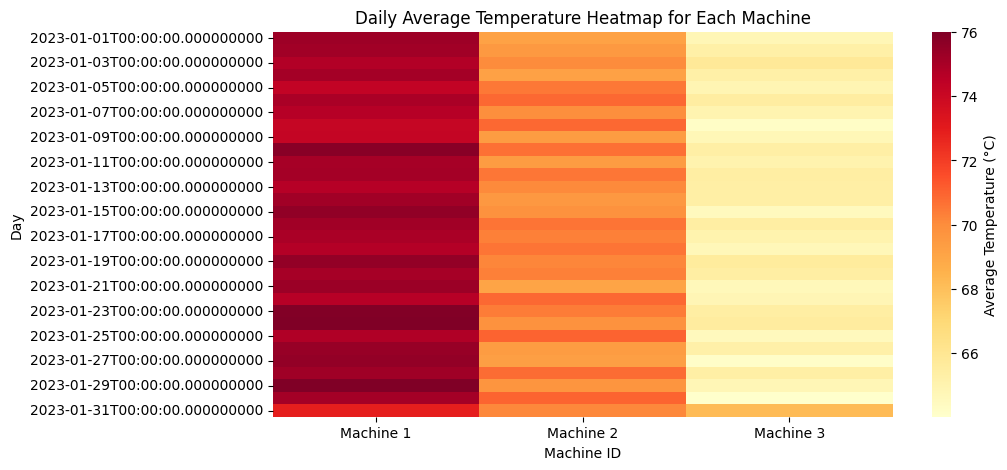

,MachineID,mean,max,min
0,Machine 1,75.121846,92.460910,57.912613
1,Machine 2,70.098080,86.956514,51.409839
2,Machine 3,65.042569,81.599004,49.754620


In [7]:
# Line Plot: Temperature Readings Over Time for Each Machine
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Timestamp", y="Temperature", hue="MachineID")
plt.title("Temperature Over Time for Each Machine")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend(title="Machine ID")
plt.show()

# Heatmap: Average Daily Tempe
df_daily_avg = df.set_index('Timestamp').groupby('MachineID')['Temperature'].resample('D').mean().unstack(level=0)

plt.figure(figsize=(10, 5))
sns.heatmap(df_daily_avg, cmap="YlOrRd", annot=False, cbar_kws={'label': 'Average Temperature (°C)'})
plt.title("Daily Average Temperature Heatmap for Each Machine")
plt.xlabel("Machine ID")
plt.ylabel("Day")
plt.show()


summary_stats
